In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:354: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if layout is not 'vertical_short':
c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:390: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layout is 'square':


In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Learning Rate'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'separate_noise_output'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

In [4]:
viz.metrics_df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,separate_noise_output,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,;128;False;0.03;5;None;,80.650002,86.842500,3.475000,94.550003,49.900002,77.099998,79.646875,5.500000,93.599998,...,128,False,0.03,5,None,84.133334,80.650002,35.901958,3.005000,80.550000
1,;128;False;0.01;5;None;,82.099998,85.283750,2.937500,93.849998,49.650002,74.949997,70.969271,2.450002,82.300003,...,128,False,0.01,5,None,79.733332,82.099998,32.871518,1.837500,72.630000
2,;128;False;0.003;5;None;,88.349998,87.231250,0.662500,91.000000,50.849998,89.900002,84.934895,1.000000,92.900002,...,128,False,0.003,5,None,91.100001,89.900002,35.013142,3.827500,75.990001
3,;128;False;0.001;5;None;,69.300003,69.141666,1.074999,73.599998,50.200001,73.800003,68.389062,1.266665,77.599998,...,128,False,0.001,5,None,73.066668,73.800003,30.770087,1.653333,66.830000
4,;128;False;0.0003;5;None;,65.400002,65.043750,1.275000,70.500000,48.099998,86.750000,78.550000,0.066666,86.949997,...,128,False,0.0003,5,None,77.333333,79.849998,30.995278,1.413334,68.520000
5,;128;False;0.0001;5;None;,74.449997,70.569167,0.425001,76.150002,47.750000,72.000000,67.217188,0.833333,74.500000,...,128,False,0.0001,5,None,75.949999,74.449997,30.139920,0.501667,67.120001
6,stat-wmm;128;True;0.03;5;None;,56.849998,64.189583,5.475000,78.750000,48.250000,50.799999,64.119791,12.516666,88.349998,...,128,True,0.03,5,None,60.983334,56.849998,33.281771,7.198333,73.900000
7,stat-wmm;128;True;0.01;5;None;,69.300003,69.447083,2.875000,80.800003,50.000000,79.599998,76.909375,4.033333,91.699997,...,128,True,0.01,5,None,79.466667,79.599998,32.738041,4.111666,73.829999
8,stat-wmm;128;True;0.003;5;None;,85.150002,83.644999,0.612499,87.599998,49.150002,91.849998,82.300000,0.316668,92.800003,...,128,True,0.003,5,None,89.466667,91.400002,33.173320,0.295834,74.800001
9,stat-wmm;128;True;0.001;5;None;,80.949997,79.061250,0.400002,82.550003,45.049999,86.199997,78.444271,0.700002,88.300003,...,128,True,0.001,5,None,83.683332,83.900002,31.837288,0.690001,71.510001


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[3]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,separate_noise_output,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,;128;False;0.03;5;None;,80.650002,86.842500,3.475000,94.550003,49.900002,77.099998,79.646875,5.500000,93.599998,...,128,False,0.03,5,None,84.133334,80.650002,35.901958,3.005000,80.550000
1,;128;False;0.01;5;None;,82.099998,85.283750,2.937500,93.849998,49.650002,74.949997,70.969271,2.450002,82.300003,...,128,False,0.01,5,None,79.733332,82.099998,32.871518,1.837500,72.630000
2,;128;False;0.003;5;None;,88.349998,87.231250,0.662500,91.000000,50.849998,89.900002,84.934895,1.000000,92.900002,...,128,False,0.003,5,None,91.100001,89.900002,35.013142,3.827500,75.990001
3,;128;False;0.001;5;None;,69.300003,69.141666,1.074999,73.599998,50.200001,73.800003,68.389062,1.266665,77.599998,...,128,False,0.001,5,None,73.066668,73.800003,30.770087,1.653333,66.830000
4,;128;False;0.0003;5;None;,65.400002,65.043750,1.275000,70.500000,48.099998,86.750000,78.550000,0.066666,86.949997,...,128,False,0.0003,5,None,77.333333,79.849998,30.995278,1.413334,68.520000
5,;128;False;0.0001;5;None;,74.449997,70.569167,0.425001,76.150002,47.750000,72.000000,67.217188,0.833333,74.500000,...,128,False,0.0001,5,None,75.949999,74.449997,30.139920,0.501667,67.120001
6,stat-wmm;128;True;0.03;5;None;,56.849998,64.189583,5.475000,78.750000,48.250000,50.799999,64.119791,12.516666,88.349998,...,128,True,0.03,5,None,60.983334,56.849998,33.281771,7.198333,73.900000
7,stat-wmm;128;True;0.01;5;None;,69.300003,69.447083,2.875000,80.800003,50.000000,79.599998,76.909375,4.033333,91.699997,...,128,True,0.01,5,None,79.466667,79.599998,32.738041,4.111666,73.829999
8,stat-wmm;128;True;0.003;5;None;,85.150002,83.644999,0.612499,87.599998,49.150002,91.849998,82.300000,0.316668,92.800003,...,128,True,0.003,5,None,89.466667,91.400002,33.173320,0.295834,74.800001
9,stat-wmm;128;True;0.001;5;None;,80.949997,79.061250,0.400002,82.550003,45.049999,86.199997,78.444271,0.700002,88.300003,...,128,True,0.001,5,None,83.683332,83.900002,31.837288,0.690001,71.510001


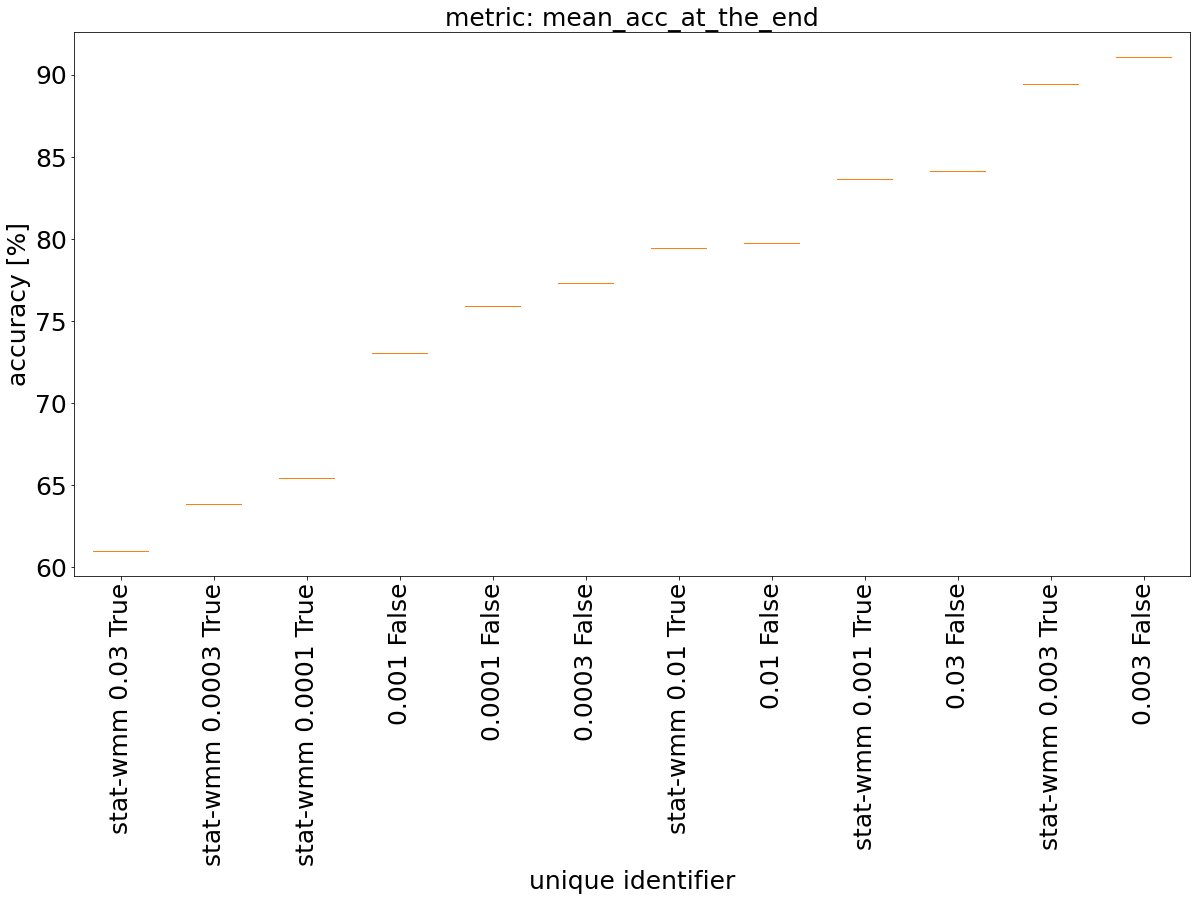

In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['separate_noise_output'].isin(['nan', 'None'])) & (df['batch_size_rehearsal']=='128')]

# metric = 'acc_at_the_end_task_0'
metric = 'mean_acc_at_the_end'
box_plot(metric, df, f"learning_rate_box_dataset_resnet18_no_separate_{metric}", 25)

df

# All runs

In [7]:
df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,separate_noise_output,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,;128;False;0.03;5;None;,80.650002,86.842500,3.475000,94.550003,49.900002,77.099998,79.646875,5.500000,93.599998,...,128,False,0.03,5,None,84.133334,80.650002,35.901958,3.005000,80.550000
1,;128;False;0.01;5;None;,82.099998,85.283750,2.937500,93.849998,49.650002,74.949997,70.969271,2.450002,82.300003,...,128,False,0.01,5,None,79.733332,82.099998,32.871518,1.837500,72.630000
2,;128;False;0.003;5;None;,88.349998,87.231250,0.662500,91.000000,50.849998,89.900002,84.934895,1.000000,92.900002,...,128,False,0.003,5,None,91.100001,89.900002,35.013142,3.827500,75.990001
3,;128;False;0.001;5;None;,69.300003,69.141666,1.074999,73.599998,50.200001,73.800003,68.389062,1.266665,77.599998,...,128,False,0.001,5,None,73.066668,73.800003,30.770087,1.653333,66.830000
4,;128;False;0.0003;5;None;,65.400002,65.043750,1.275000,70.500000,48.099998,86.750000,78.550000,0.066666,86.949997,...,128,False,0.0003,5,None,77.333333,79.849998,30.995278,1.413334,68.520000
5,;128;False;0.0001;5;None;,74.449997,70.569167,0.425001,76.150002,47.750000,72.000000,67.217188,0.833333,74.500000,...,128,False,0.0001,5,None,75.949999,74.449997,30.139920,0.501667,67.120001
6,stat-wmm;128;True;0.03;5;None;,56.849998,64.189583,5.475000,78.750000,48.250000,50.799999,64.119791,12.516666,88.349998,...,128,True,0.03,5,None,60.983334,56.849998,33.281771,7.198333,73.900000
7,stat-wmm;128;True;0.01;5;None;,69.300003,69.447083,2.875000,80.800003,50.000000,79.599998,76.909375,4.033333,91.699997,...,128,True,0.01,5,None,79.466667,79.599998,32.738041,4.111666,73.829999
8,stat-wmm;128;True;0.003;5;None;,85.150002,83.644999,0.612499,87.599998,49.150002,91.849998,82.300000,0.316668,92.800003,...,128,True,0.003,5,None,89.466667,91.400002,33.173320,0.295834,74.800001
9,stat-wmm;128;True;0.001;5;None;,80.949997,79.061250,0.400002,82.550003,45.049999,86.199997,78.444271,0.700002,88.300003,...,128,True,0.001,5,None,83.683332,83.900002,31.837288,0.690001,71.510001


In [8]:
viz.runs_params_settings_idxs_dict

{';128;False;0.03;5;None': [0],
 ';128;False;0.01;5;None': [1],
 ';128;False;0.003;5;None': [2],
 ';128;False;0.001;5;None': [3],
 ';128;False;0.0003;5;None': [4],
 ';128;False;0.0001;5;None': [5],
 'stat-wmm;128;True;0.03;5;None': [6],
 'stat-wmm;128;True;0.01;5;None': [7],
 'stat-wmm;128;True;0.003;5;None': [8],
 'stat-wmm;128;True;0.001;5;None': [9],
 'stat-wmm;128;True;0.0003;5;None': [10],
 'stat-wmm;128;True;0.0001;5;None': [11]}

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:404: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           74.45 &     70.57 &               0.43 &  test \\
    1 &           72.00 &     67.22 &               0.83 &  test \\
    2 &           81.40 &     64.36 &               0.00 &  test \\
    3 &           52.65 &     52.69 &               1.25 &  test \\
    4 &           44.35 &     44.05 &               0.00 &  test \\
\bottomrule
\end{tabular}



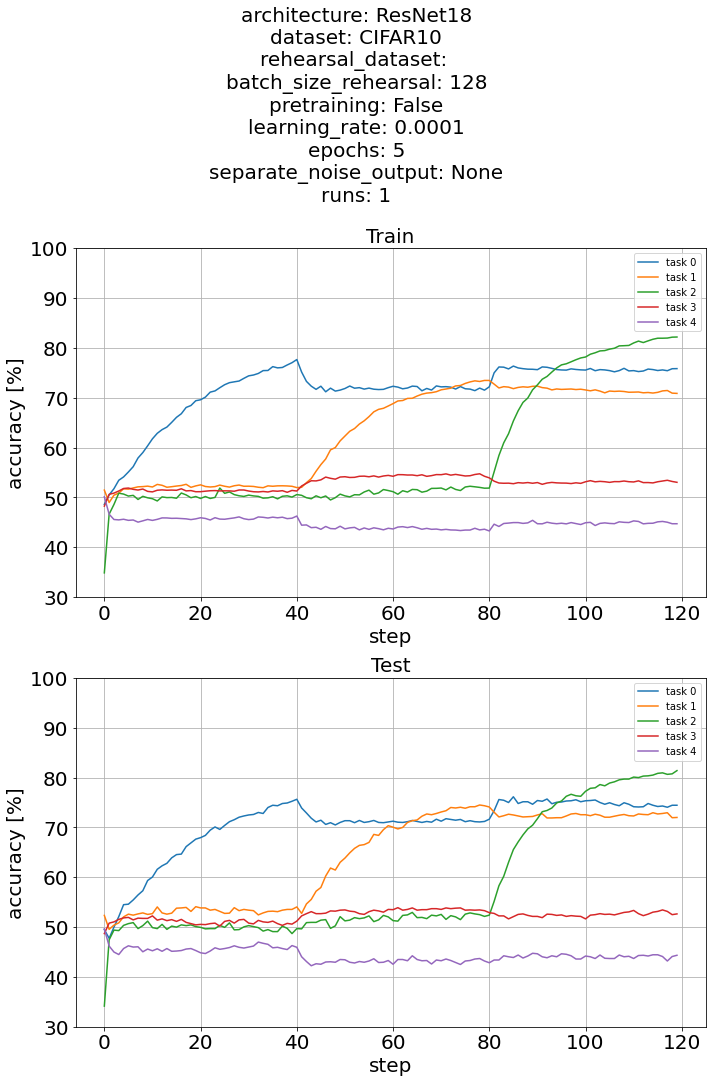

In [19]:
setup_name = 'stat-wmm;128;True;0.0001;5;None'
setup_name = ';128;False;0.0001;5;None'
viz.plot_single_setting_aggregated(setup_name, 20, filename=setup_name, layout='vertical_short', plot_till=3/5)

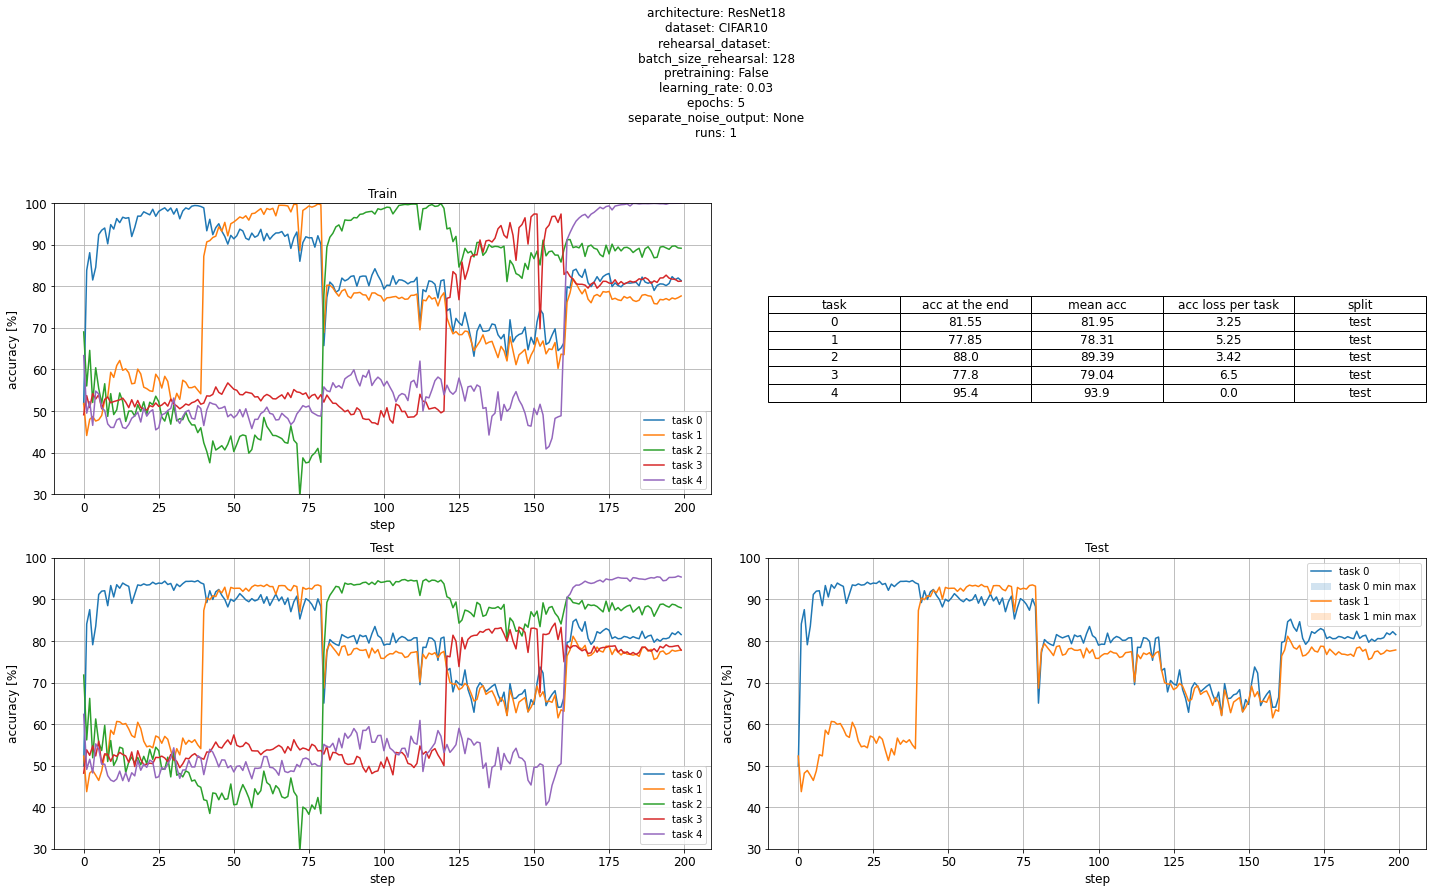

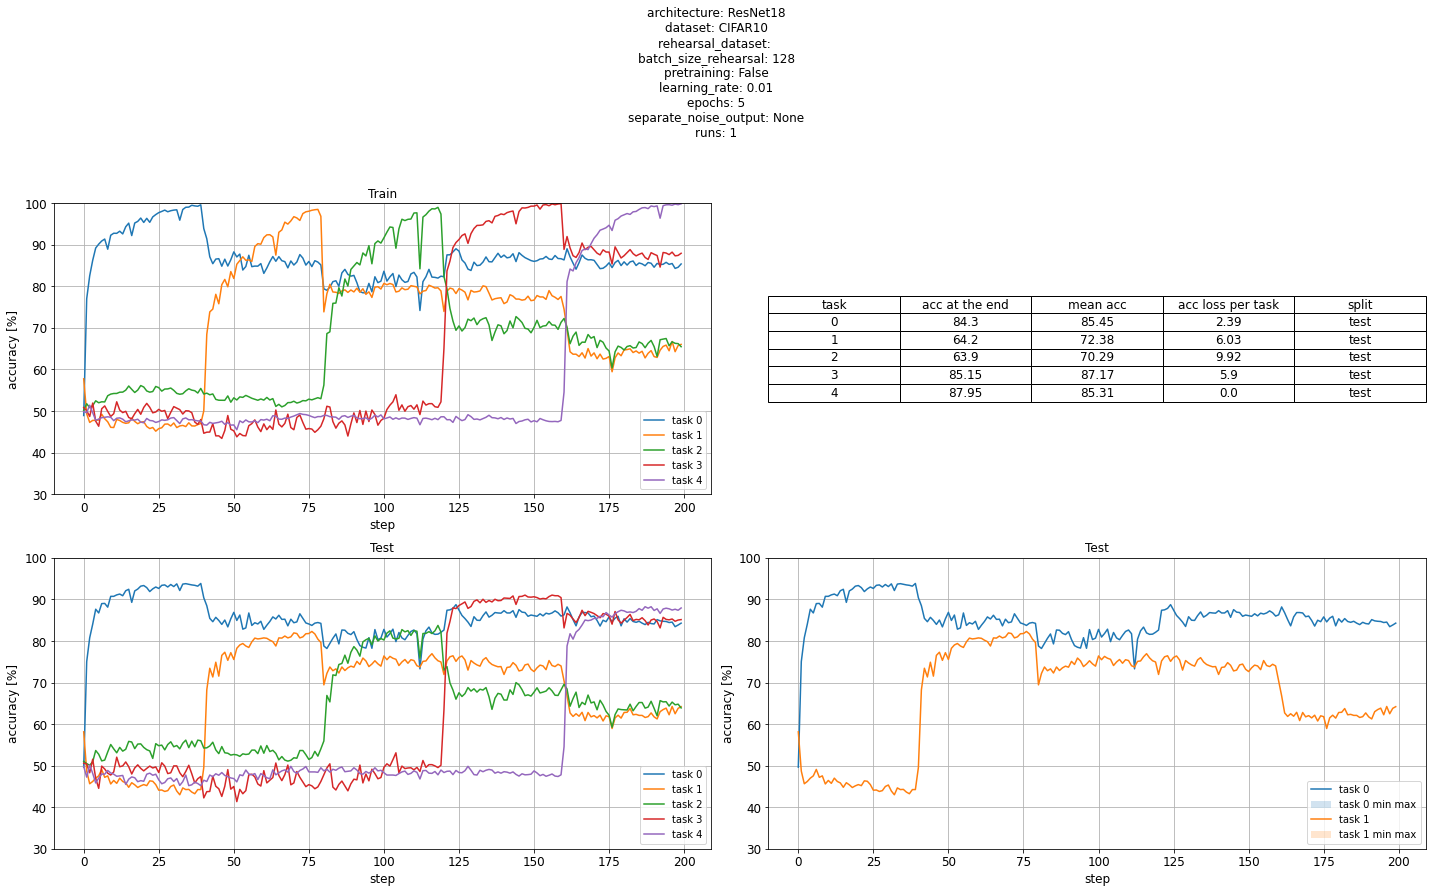

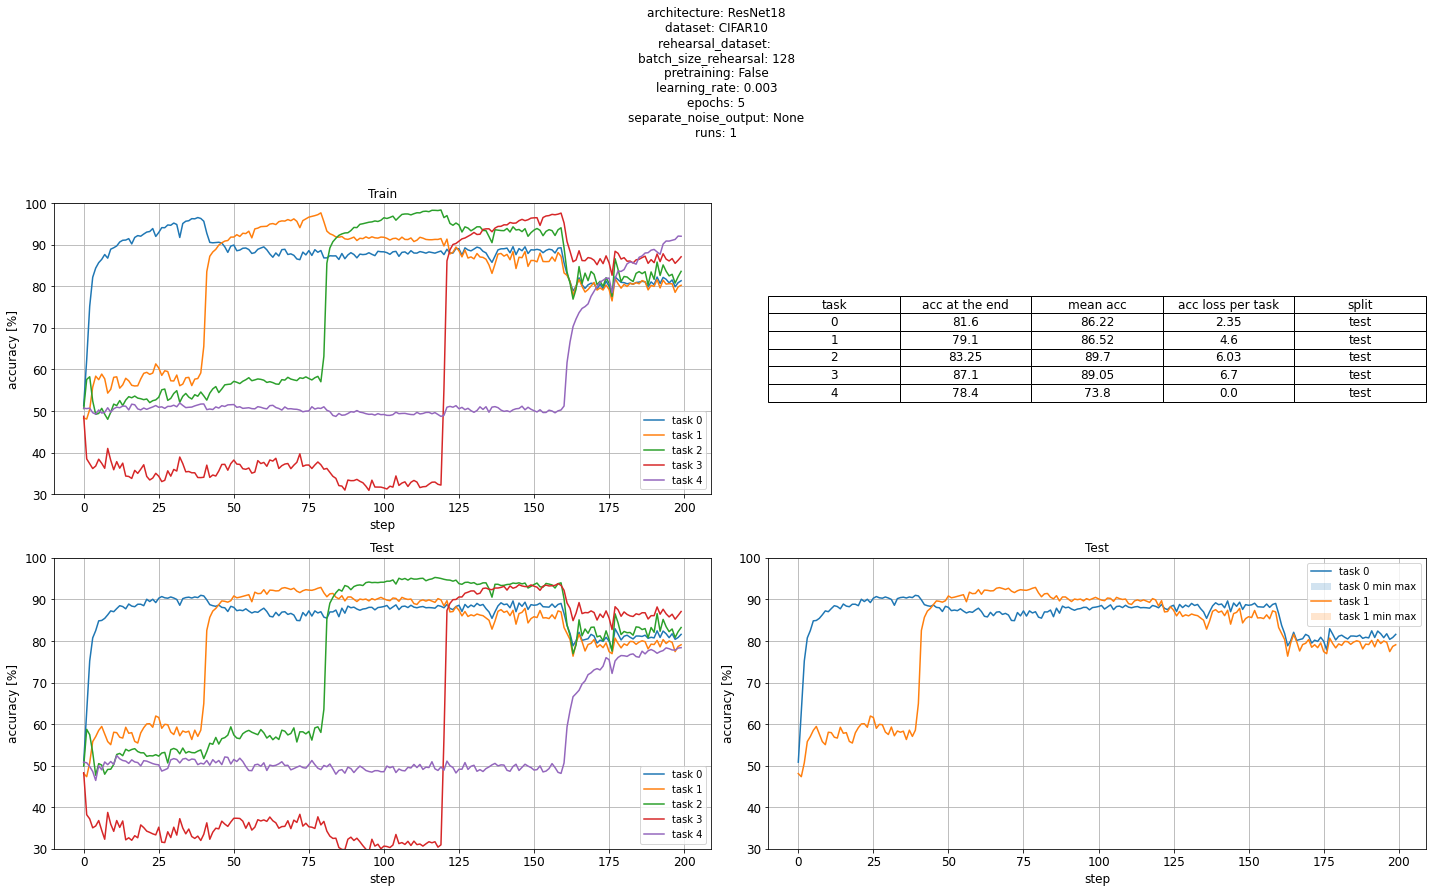

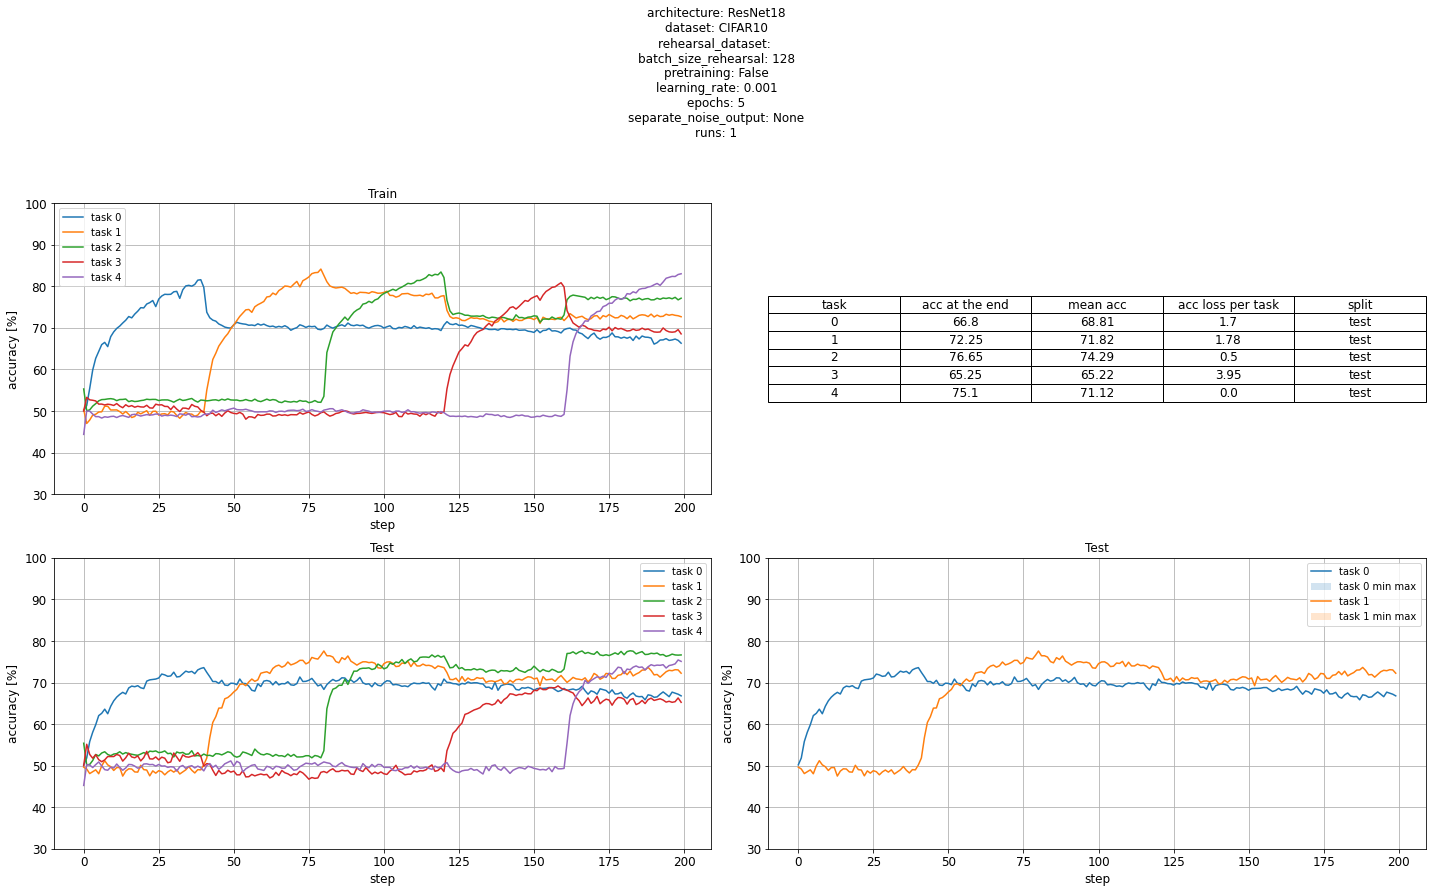

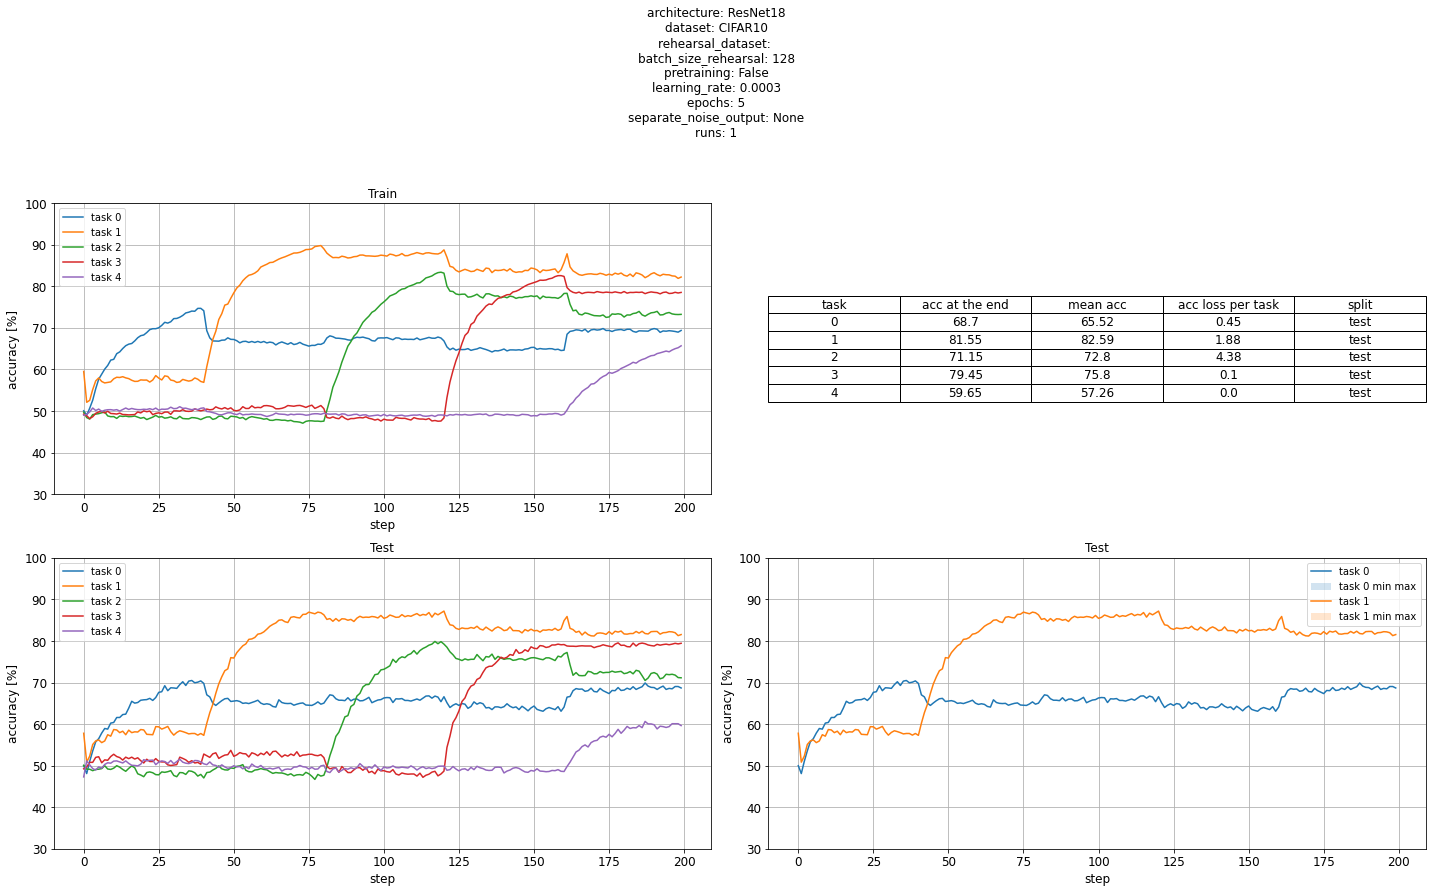

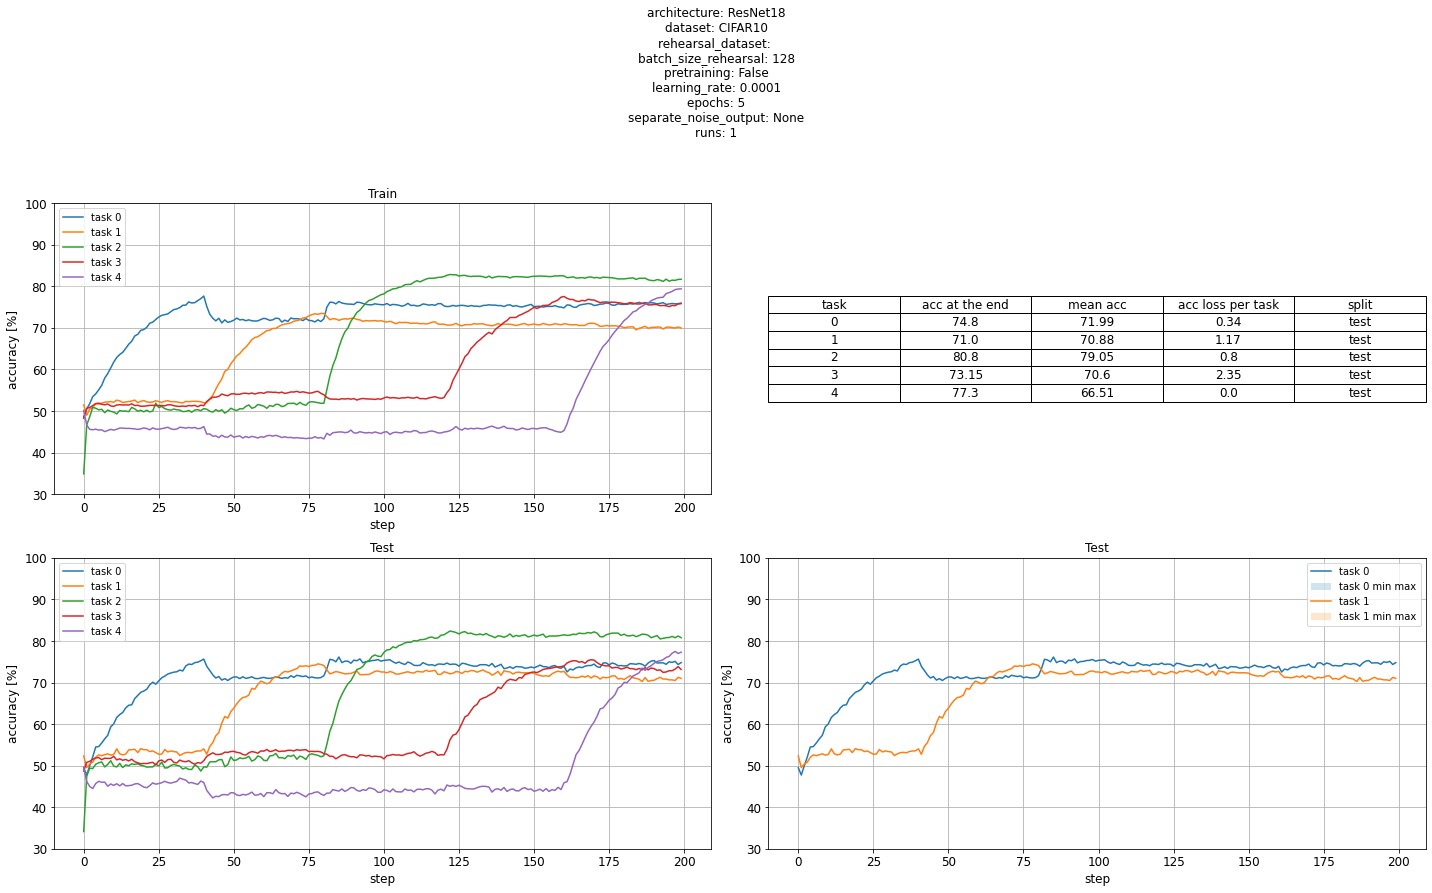

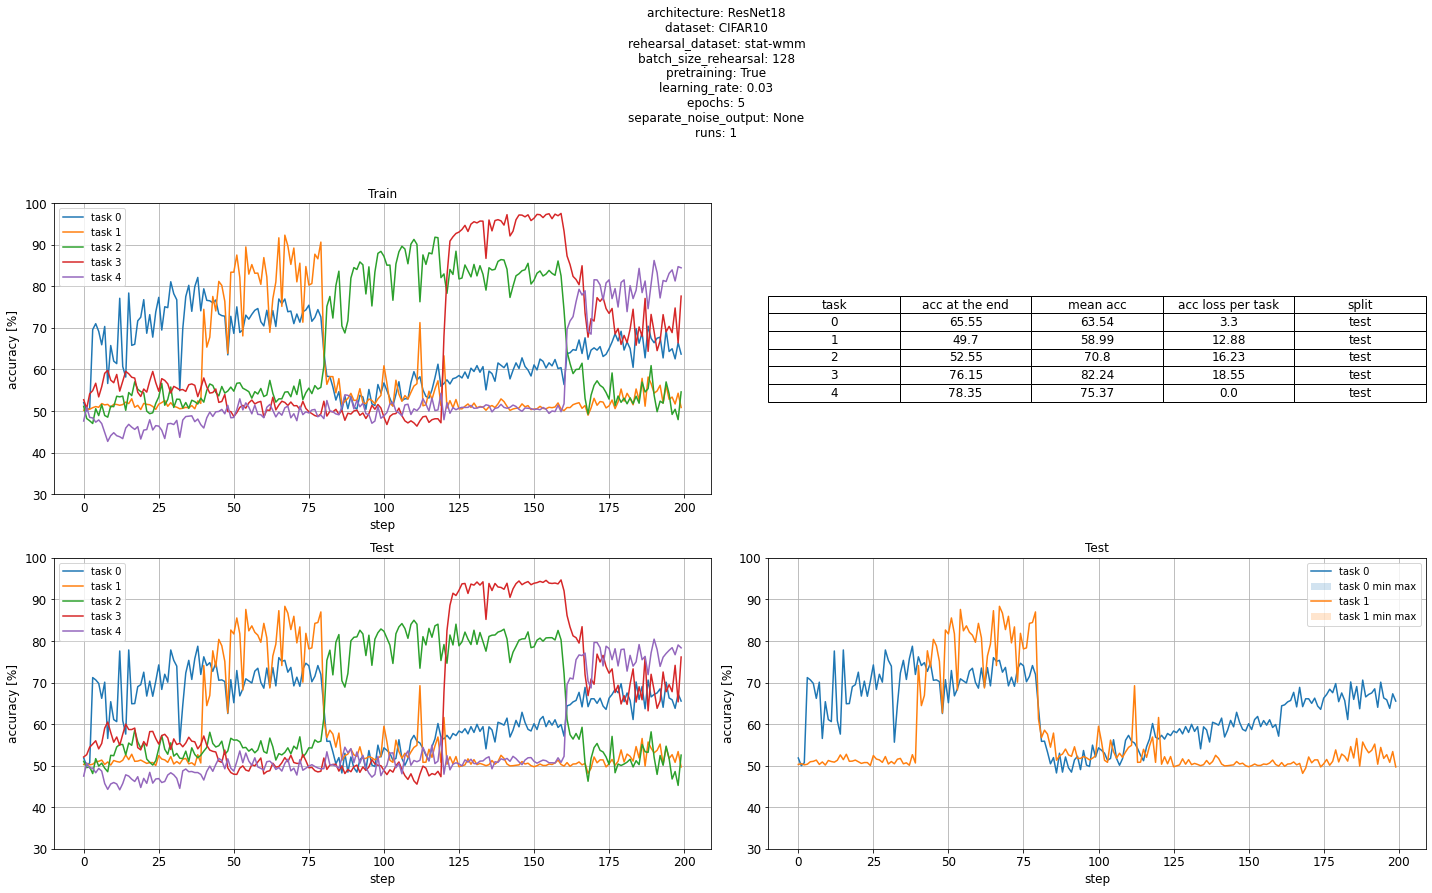

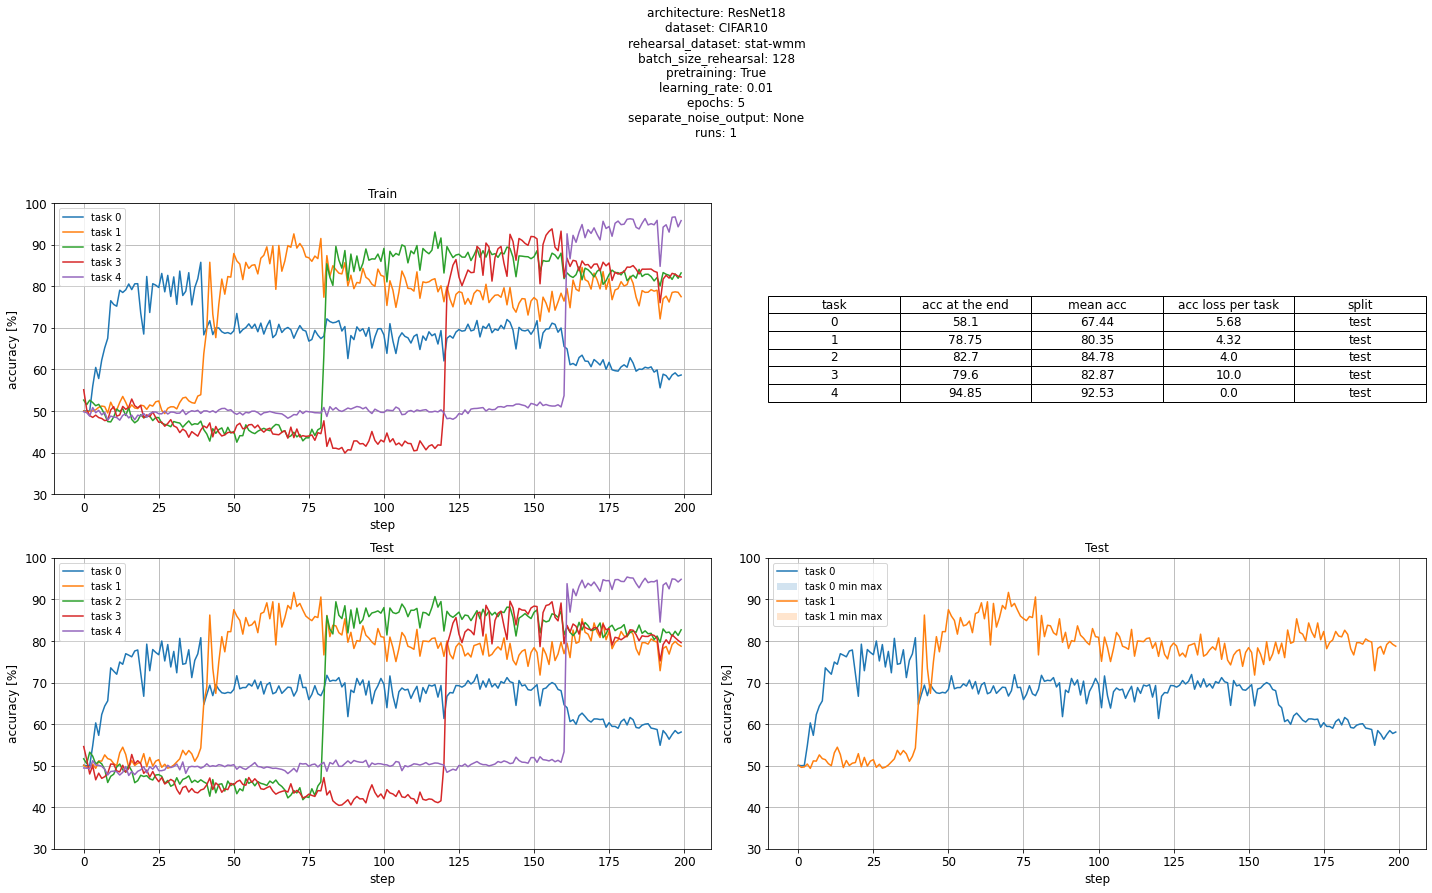

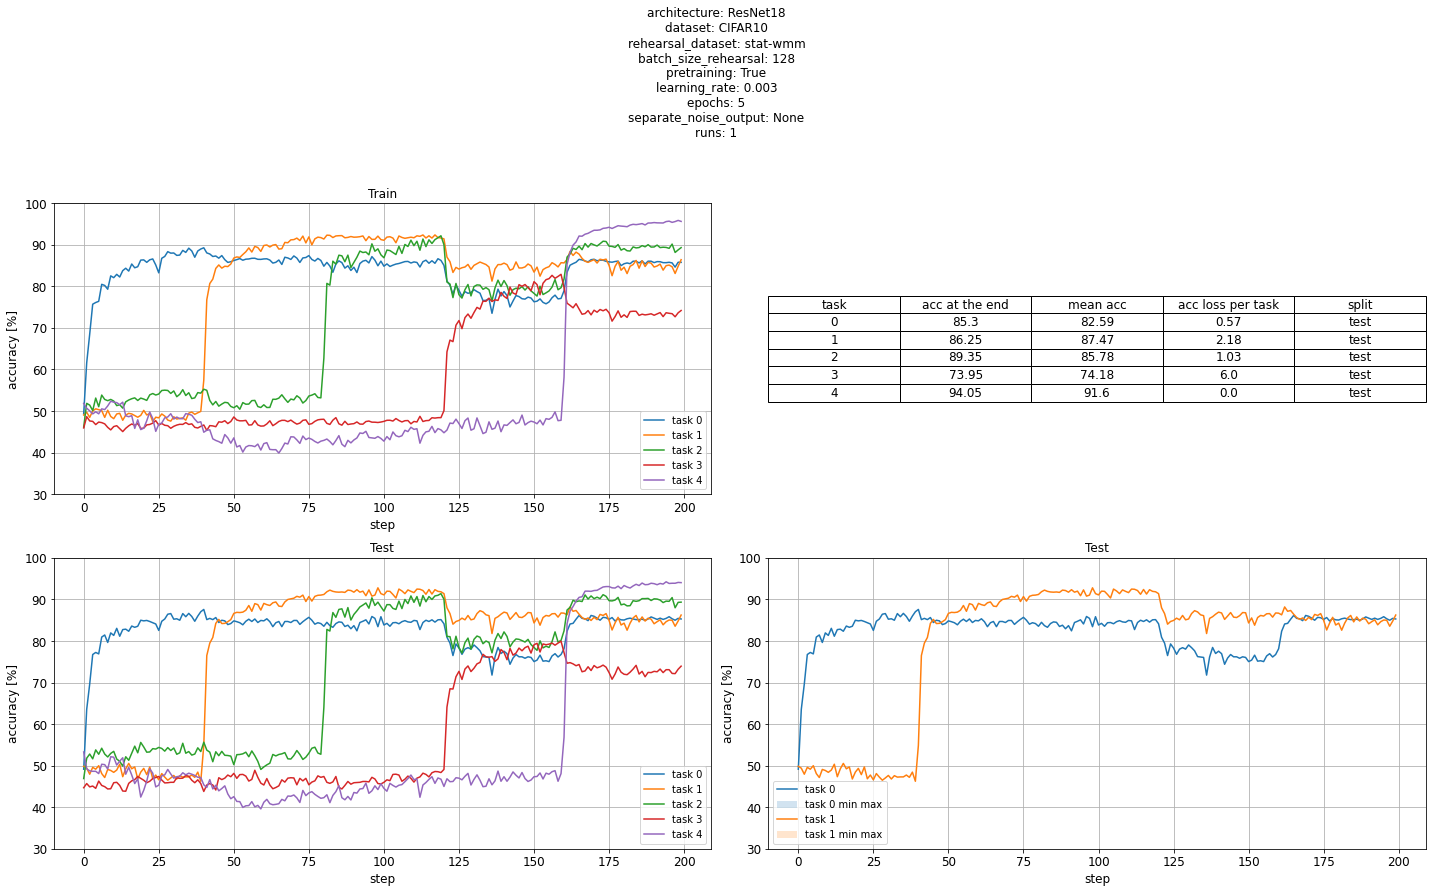

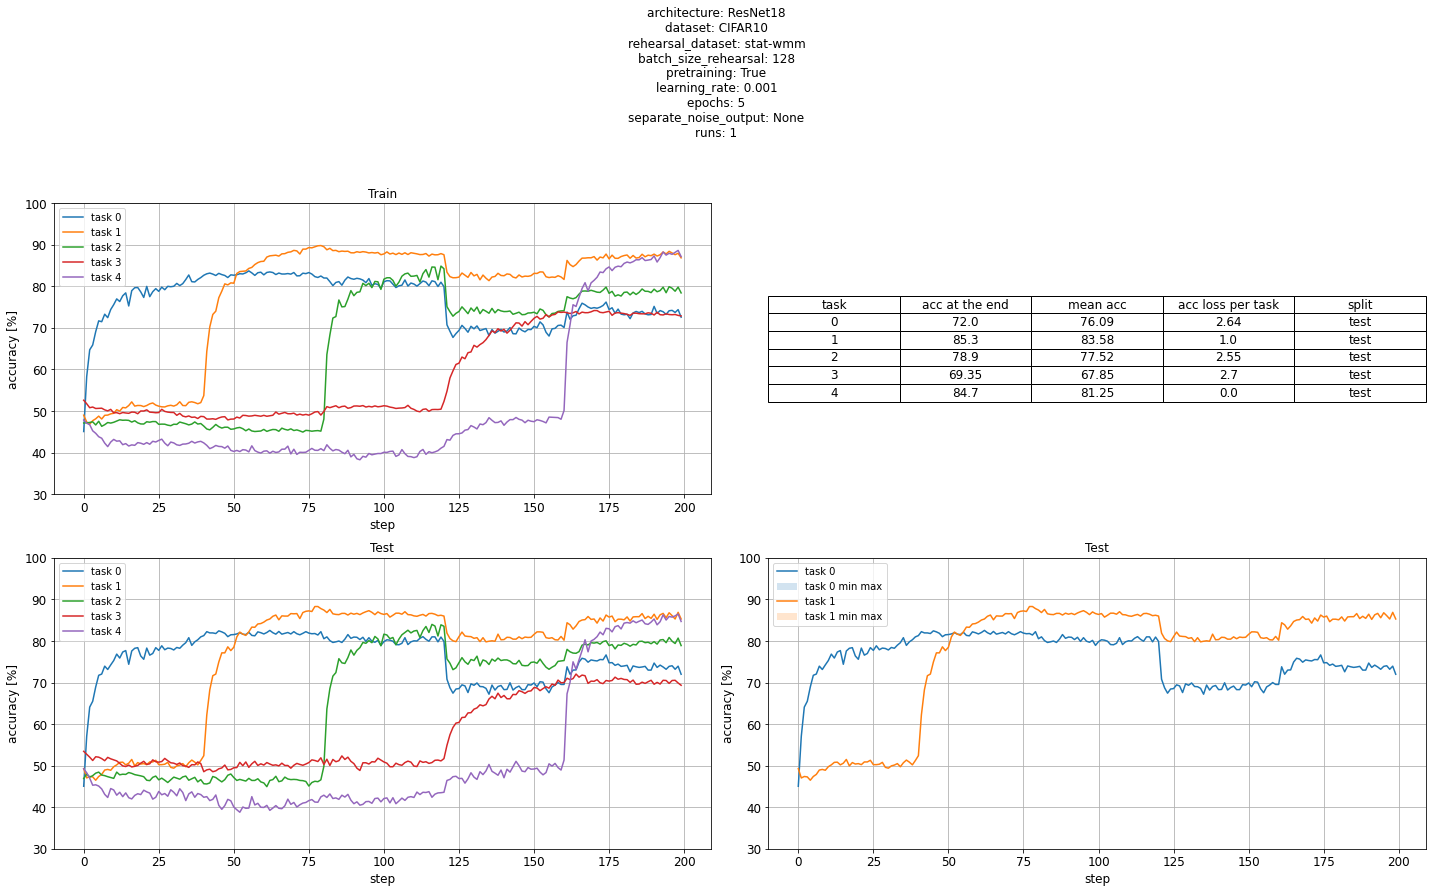

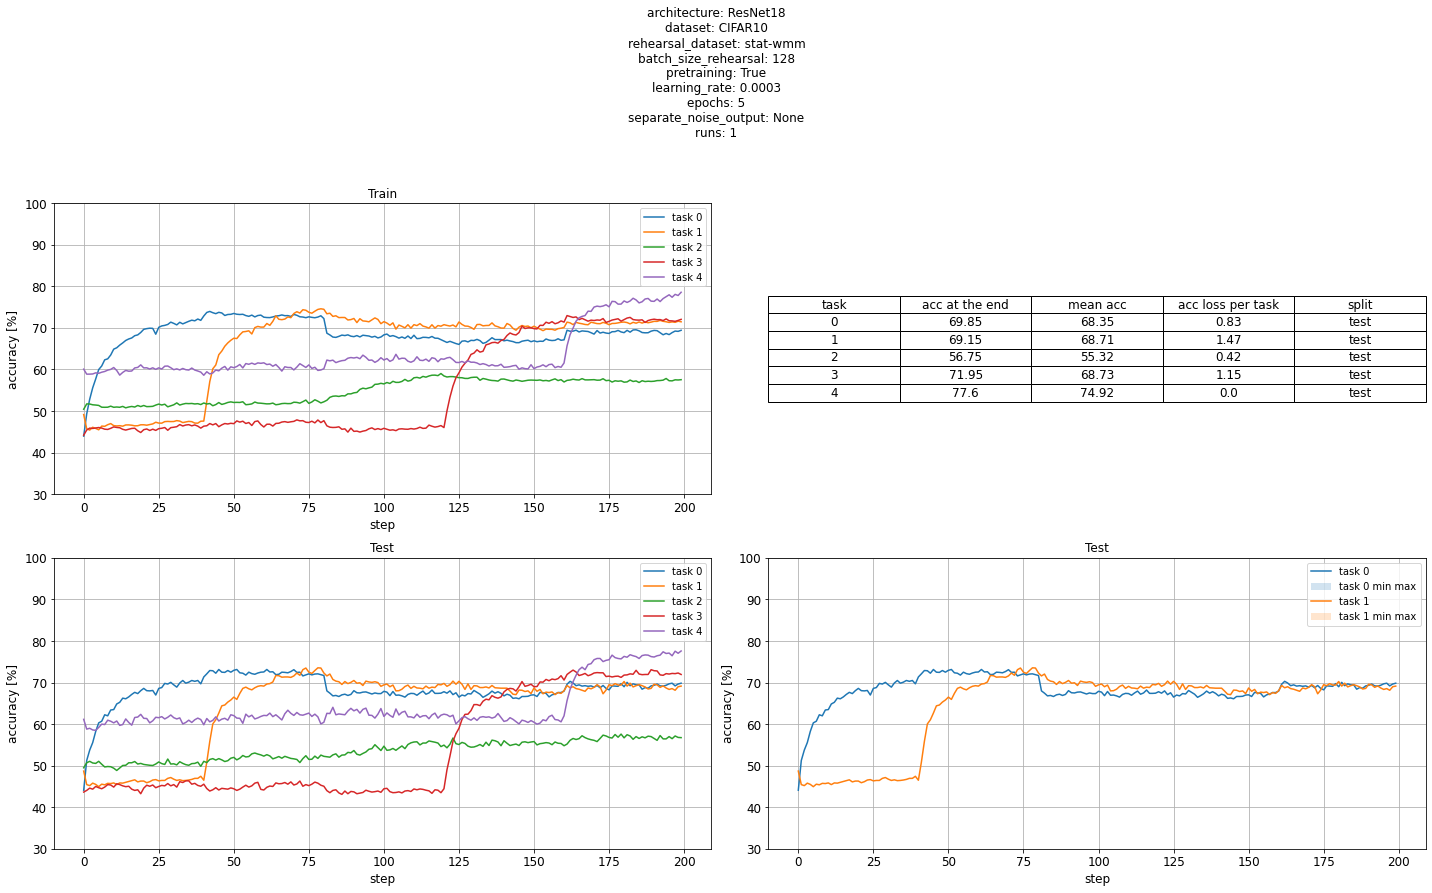

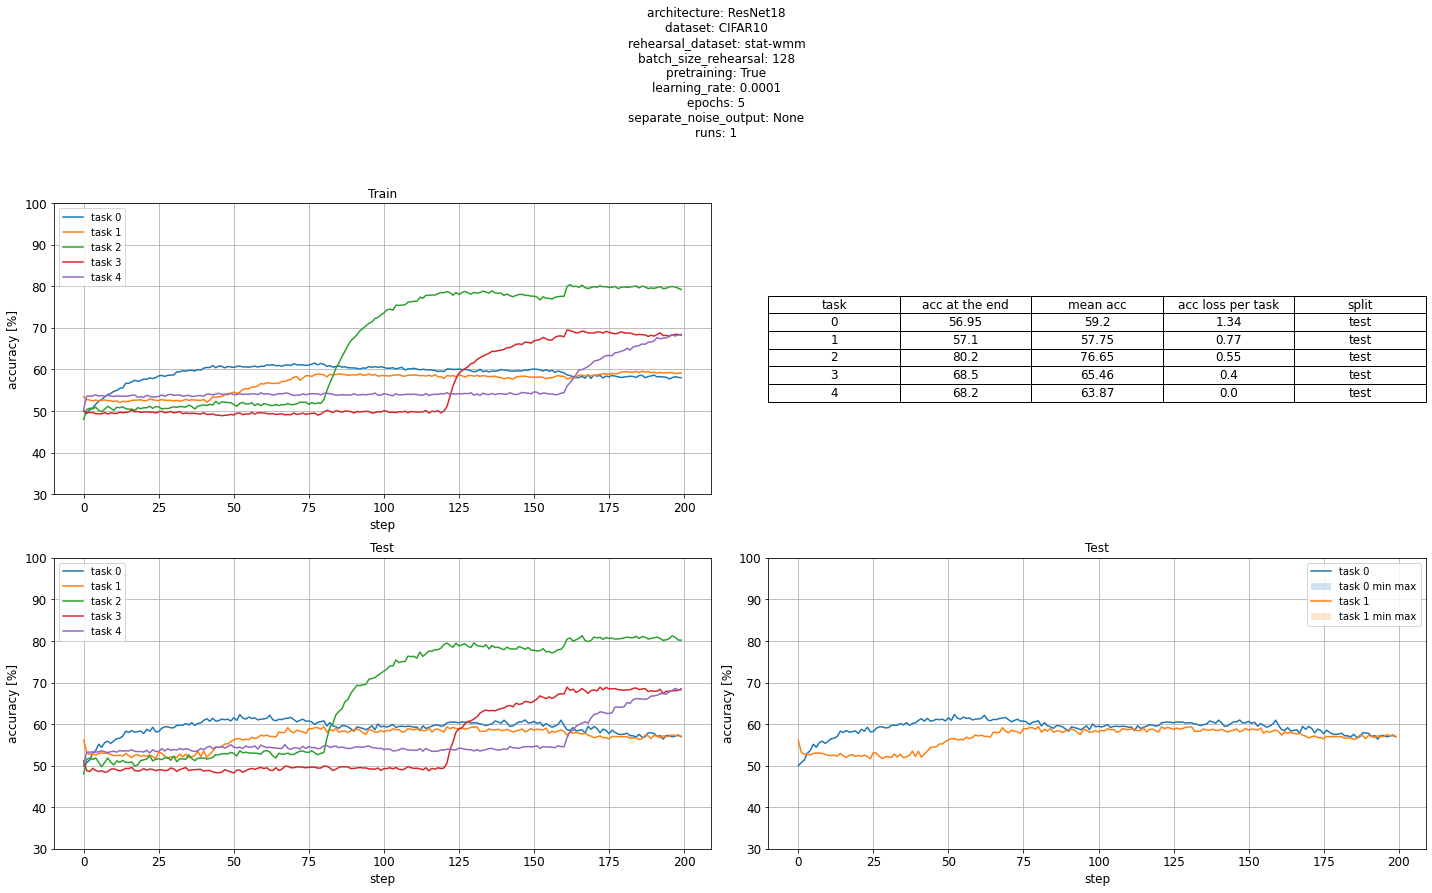

In [10]:
viz.plot_everything()